In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
adv = pd.read_csv(r'C:\Users\Pranav\Downloads\advertising.csv')

In [3]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


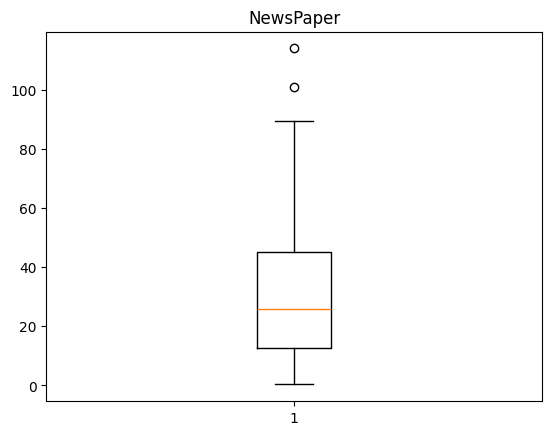

In [5]:
plt.boxplot(adv['Newspaper'])

plt.title('NewsPaper')

plt.show()

In [6]:
adv.shape

(200, 4)

In [8]:
print(np.percentile(adv['Newspaper'],25))

12.75


In [9]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


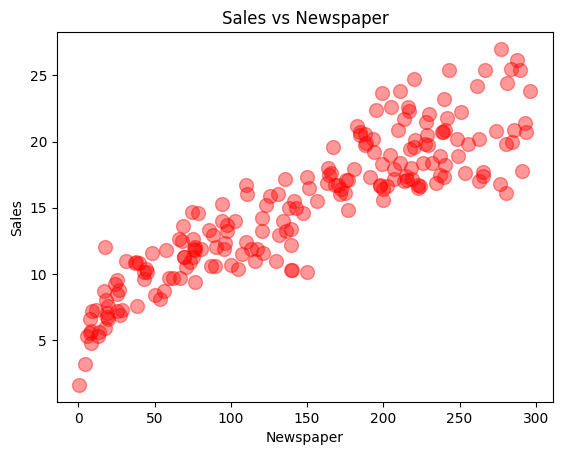

In [10]:
plt.scatter(adv['TV'],adv['Sales'],c='Red',alpha=0.4,s=100)

plt.title('Sales vs Newspaper')

plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

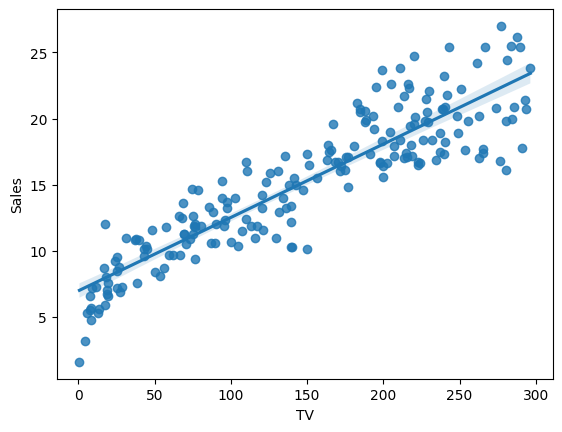

In [11]:
#Visualizing using seaborn graph
sns.regplot(x='TV',y='Sales',data=adv)

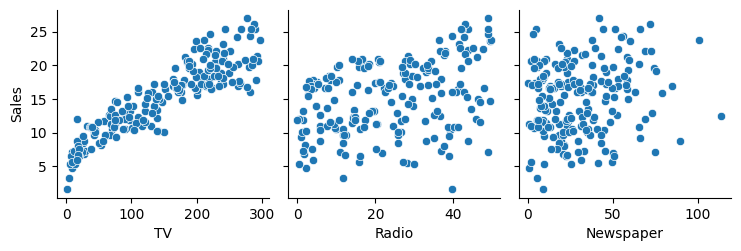

In [12]:
#Visualizing all 3 parameters through pair plot
sns.pairplot(data=adv, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')

In [13]:
#Checking the correlation
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

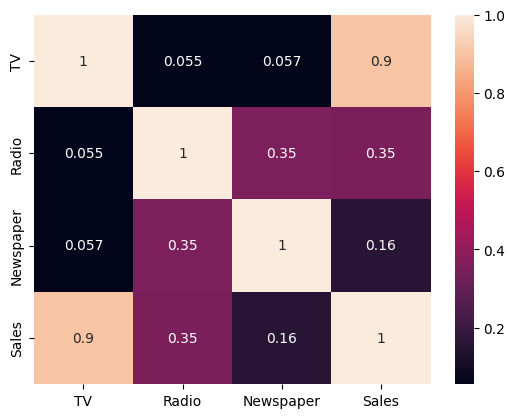

In [14]:
#Visualizing the correlation among variables
sns.heatmap(adv.corr(),annot=True)

Equation of Linear Regression

y = c + m1x1 + m2x2 + m3x3........mnxn

y is the response
c is the intercept
m1 is the coeffecient of the first feature
m2 is the coeffecient of the second feature

In our case :
y = c + m1*TV

The m values are called model variables or model parameters


In [15]:
import sklearn

In [16]:
from sklearn.model_selection import *

#Creating predictor and independent variable
X = adv['TV']
y = adv['Sales']

#Dividing the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [17]:
X_train.shape

(160,)

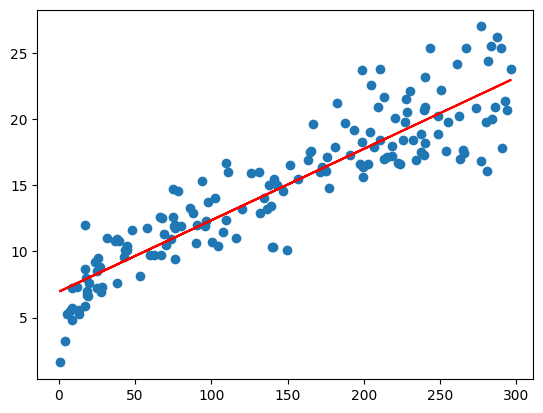

In [18]:
#Training the ML model once we have identified the coeffecients

plt.scatter(X_train,y_train)

plt.plot(X_train, 6.948 + 0.054*X_train, 'r')

plt.show()

In [19]:
from sklearn.metrics import *

Linear Regression using SKlearn model

In [20]:
X_train_lm = X_train.values.reshape(-1,1)
X_train_lm.shape

(160, 1)

In [21]:
X_test_lm = X_test.values.reshape(-1,1)
X_test_lm.shape

(40, 1)

In [22]:
from sklearn.linear_model import LinearRegression

#Creating an object of Linear Regression
lm = LinearRegression()

#Fiting the model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [23]:
#Check the parameters which are the slope(coeffecient) and intercept

print(lm.coef_)
print(lm.intercept_)

[0.05410548]
6.995532914307688


In [24]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [25]:
r2_score(y_true=y_train,y_pred=6.948 + 0.054*X_train)

0.821476832864998

In [26]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7281352744078883